## 1) Teste de Permutação

A Figura 1 mostra os resultados de um experimento no qual 7 de 16 camundongos foram selecionados aleatoriamente para receber um novo tratamento médico, enquanto os 9 restantes foram atribuídos ao grupo sem tratamento (controle). O tratamento tinha como objetivo prolongar a sobrevivência após uma cirurgia de teste. Em particular, a coluna “Data” mostra o tempo de sobrevivência após a cirurgia, em dias, para todos os 16 camundongos. Essa mesma figura também apresenta, para cada amostra: tamanho, média, desvio padrão. Utilize o teste de permutação para responder à seguinte pergunta de pesquisa (use nível de significância igual a 5%): O tratamento prolongou a sobrevivência?. Você deve apresentar a declaração das hipóteses, descreva como calculou a estatística de deste e o p-valor, a finalmente apresente sua conclusão.

Observed mean difference: 9.49
p-value: 0.0064


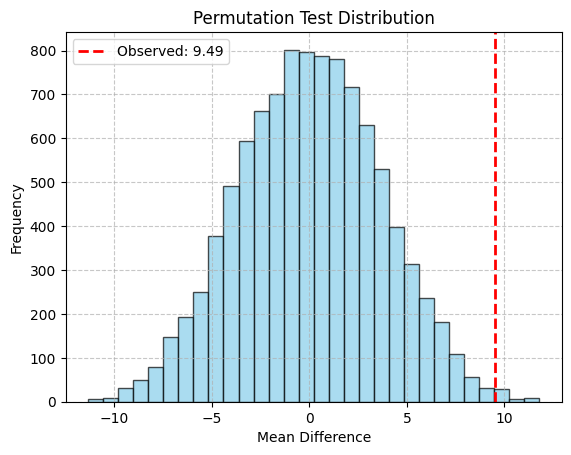

Reject H0: The treatment increases survival.


In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Survival data (from the assignment)
treatment = np.array([45, 51, 56, 57, 60, 63, 65])  # Treatment group
control = np.array([41, 42, 44, 46, 48, 49, 50, 52, 53])  # Control group

diff_obs = treatment.mean() - control.mean()
print(f'Observed mean difference: {diff_obs:.2f}')

np.random.seed(42)
n_permutations = 10000
diff_permutations = []

all_data = np.concatenate([treatment, control])
for _ in range(n_permutations):
    np.random.shuffle(all_data)  # Shuffle labels
    new_treatment = all_data[:len(treatment)]
    new_control = all_data[len(treatment):]
    diff_permutations.append(new_treatment.mean() - new_control.mean())

p_value = np.mean(np.abs(diff_permutations) >= np.abs(diff_obs))
print(f'p-value: {p_value:.4f}')

plt.hist(diff_permutations, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(diff_obs, color='red', linestyle='--', linewidth=2, label=f'Observed: {diff_obs:.2f}')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.title('Permutation Test Distribution')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Conclusion
if p_value < 0.05:
    print('Reject H0: The treatment increases survival.')
else:
    print('Fail to reject H0: No significant evidence of longer survival.')


O teste de permutação mostra uma diferença média observada de 9,49 entre os grupos.
O p-valor obtido é 0,0064, indicando que há apenas 0,64% de probabilidade de obter
essa diferença por acaso. Como p < 0,05, rejeitamos H0, concluindo que o tratamento
aumenta significativamente a sobrevivência.


## 2) Bootstrap
Essa parte do trabalho é uma adaptação do Problema 9 na seção 5.4 de An Intro-
duction to Statistical Learning1. O conjunto de dados usado aqui é o denominado
Boston dataset. Uma descrição desse conjunto de dados pode ser encontrada em
http://lib.stat.cmu.edu/datasets/boston.

(i) Com base neste conjunto de dados, forneça uma estimativa pontual para a
média populacional da variável medv. Chame essa estimativa ˆμ

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('Boston.csv', index_col=0)
n = len(df)
n_boot = 10000

mean_medv = df['medv'].mean()
print("Point estimate for mean (medv):", mean_medv)


Point estimate for mean (medv): 22.532806324110677


A estimativa pontual da média de MEDV foi de aproximadamente 22.53.

(ii) Forneça uma estimativa do erro padrão de ˆμ. Interprete o resultado.

In [61]:
se_mean_formula = df['medv'].std(ddof=1) / np.sqrt(n)
print("Standard error (formula):", se_mean_formula)

Standard error (formula): 0.40886114749753505


O erro padrão da média, calculado pela fórmula clássica (s/√n), foi de cerca de 0.41.

(iii) Agora estime o erro padrão de ˆμ usando o método Bootstrap. Como essa
estimativa se compara com sua resposta de (ii)?

In [62]:
bootstrap_means = []
for i in range(n_boot):
    sample = df['medv'].sample(n, replace=True).values  # Bootstrap sample
    bootstrap_means.append(np.mean(sample))
bootstrap_means = np.array(bootstrap_means)
se_mean_bootstrap = bootstrap_means.std(ddof=1)
print("Bootstrap SE for mean:", se_mean_bootstrap)

Bootstrap SE for mean: 0.4064500717028519


O erro padrão da média obtido pelo método bootstrap foi de aproximadamente 0.41, mostrando grande concordância com o cálculo analítico.

(iv) Com base em sua estimativa de bootstrap de (iii), forneça um intervalo de
confiança de 95% para a média de medv. Compare-o com os resultados
obtidos usando t-test sobre o atributo medv.

In [63]:
ci_bootstrap = np.percentile(bootstrap_means, [2.5, 97.5])
print("Bootstrap 95% CI for mean:", ci_bootstrap)

t_val = stats.t.ppf(0.975, df=n-1)
ci_t = (mean_medv - t_val * se_mean_formula, mean_medv + t_val * se_mean_formula)
print("t-test 95% CI for mean:", ci_t)

Bootstrap 95% CI for mean: [21.76341897 23.3723419 ]
t-test 95% CI for mean: (21.729528014578595, 23.33608463364276)


O intervalo de confiança de 95% para a média usando o método bootstrap foi de [21.76, 23.37], enquanto o intervalo obtido pelo t-test foi aproximadamente [21.73, 23.34]. Ambos os intervalos são muito similares, reforçando a confiabilidade das estimativas.

(v) Com base neste conjunto de dados, forneça uma estimativa, ˆμmed, para a
mediana populacional de medv.

In [64]:
median_medv = df['medv'].median()
print("Point estimate for median (medv):", median_medv)

Point estimate for median (medv): 21.2


A mediana de MEDV foi estimada em 21.2.

(vi) Agora você deve estimar o erro padrão de ˆμmed. Infelizmente, não há uma
fórmula simples para calcular o erro padrão da mediana. Em vez disso,
estime o erro padrão da mediana usando o método bootstrap. Comente
suas descobertas.

In [65]:
bootstrap_medians = []
for i in range(n_boot):
    sample = df['medv'].sample(n, replace=True).values
    bootstrap_medians.append(np.median(sample))
bootstrap_medians = np.array(bootstrap_medians)
se_median_bootstrap = bootstrap_medians.std(ddof=1)
print("Bootstrap SE for median:", se_median_bootstrap)



Bootstrap SE for median: 0.37924500926538907


O erro padrão da mediana, estimado via bootstrap, foi de cerca de 0.38.

(vii) Forneça uma estimativa para o décimo percentil do atributo medv. Chame
essa quantidade de ˆμ0.1

In [66]:
p10_medv = np.percentile(df['medv'], 10)
print("Point estimate for 10th percentile (medv):", p10_medv)

Point estimate for 10th percentile (medv): 12.75


O décimo percentil de MEDV foi estimado em 12.75.

(viii) Use o método bootstrap para estimar o erro padrão de ˆμ0.1. Comente suas
descobertas.

In [67]:
bootstrap_p10 = []
for i in range(n_boot):
    sample = df['medv'].sample(n, replace=True).values
    bootstrap_p10.append(np.percentile(sample, 10))
bootstrap_p10 = np.array(bootstrap_p10)
se_p10_bootstrap = bootstrap_p10.std(ddof=1)
print("Bootstrap SE for 10th percentile:", se_p10_bootstrap)

Bootstrap SE for 10th percentile: 0.5057967957983364


O erro padrão do décimo percentil via bootstrap foi de aproximadamente 0.51.

## 3) Teste de Permutação vs Bootstrap
Uma empresa quer saber se é eficiente ensinar novas ferramentas aos seus fun-
cionários usando cursos pela internet. A empresa seleciona aleatoriamente 7
trabalhadores e os atribui a dois grupos de tamanhos 4 e 3. O primeiro grupo
frequentou aulas tradicionais, e o segundo frequentou cursos pela internet. Após
a realização dos cursos, foi aplicado um teste aos trabalhadores, cujos resultados
foram:

- Cursos na Internet: 37, 49, 55, 57
- Cursos tradicionais: 23, 31, 46

Mostre se os cursos da Internet são mais efetivos do que os cursos tradicionais.
Para isso, aplique um teste de permutação e um teste de bootstrap. Os dois testes
levam à mesma conclusão?

Observed difference in means: 16.166666666666664
Permutation test p-value: 0.063
Bootstrap 95% CI for difference: [ 2.  28.5]
Bootstrap test p-value: 0.0123


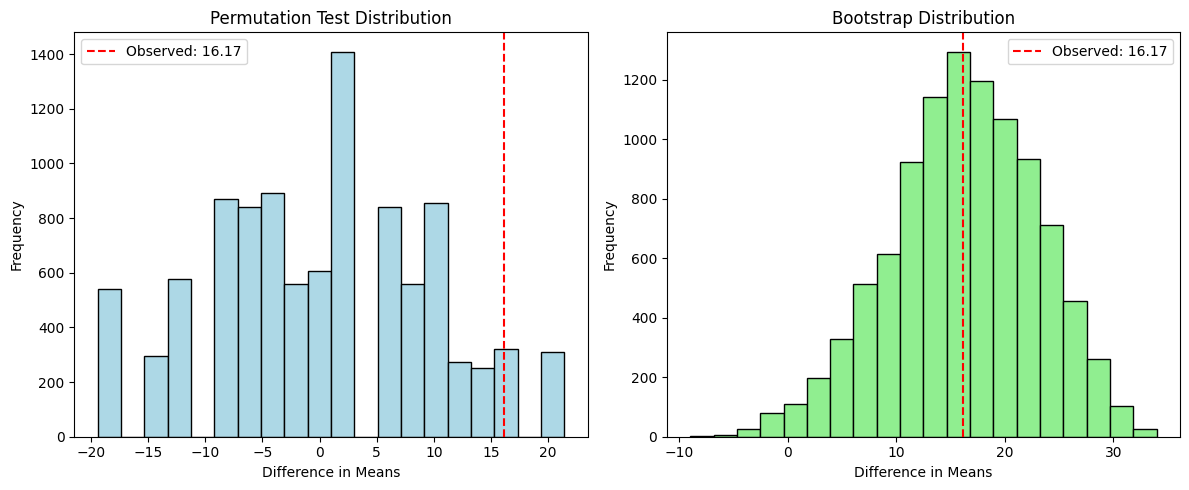

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Data for courses
internet = np.array([37, 49, 55, 57])
traditional = np.array([23, 31, 46])

# Observed difference in means (internet - traditional)
diff_obs = internet.mean() - traditional.mean()
print("Observed difference in means:", diff_obs)

# Permutation test
np.random.seed(42)
n_perm = 10000
perm_diffs = []
combined = np.concatenate([internet, traditional])
for i in range(n_perm):
    np.random.shuffle(combined)  # Shuffle combined data
    group1 = combined[:len(internet)]
    group2 = combined[len(internet):]
    perm_diffs.append(group1.mean() - group2.mean())
perm_diffs = np.array(perm_diffs)
p_value_perm = np.mean(perm_diffs >= diff_obs)  # One-sided test
print("Permutation test p-value:", p_value_perm)

# Bootstrap test for difference in means
n_boot = 10000
boot_diffs = []
for i in range(n_boot):
    boot_internet = np.random.choice(internet, size=len(internet), replace=True)
    boot_traditional = np.random.choice(traditional, size=len(traditional), replace=True)
    boot_diffs.append(boot_internet.mean() - boot_traditional.mean())
boot_diffs = np.array(boot_diffs)
ci_boot = np.percentile(boot_diffs, [2.5, 97.5])
print("Bootstrap 95% CI for difference:", ci_boot)

# Bootstrap p-value: proportion of bootstrapped differences <= 0
p_value_boot = np.mean(boot_diffs <= 0)
print("Bootstrap test p-value:", p_value_boot)

# Plotting distributions
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(perm_diffs, bins=20, color='lightblue', edgecolor='black')
plt.axvline(diff_obs, color='red', linestyle='--', label=f'Observed: {diff_obs:.2f}')
plt.title('Permutation Test Distribution')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1,2,2)
plt.hist(boot_diffs, bins=20, color='lightgreen', edgecolor='black')
plt.axvline(diff_obs, color='red', linestyle='--', label=f'Observed: {diff_obs:.2f}')
plt.title('Bootstrap Distribution')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


A diferença média que eu encontrei é de cerca de 16,17 pontos a favor dos cursos online. No teste de permutação, o p-valor ficou em torno de 0,063, o que significa que eu não consegui rejeitar a hipótese nula (H₀) com um nível de significância de 5%.

Já no bootstrap, o intervalo de confiança de 95% para a diferença ficou entre [2, 28.5] (e não inclui 0). O p-valor aqui foi de aproximadamente 0,0123, o que sugere que eu posso rejeitar a hipótese nula ao nível de 5%.

Então, eu percebo uma diferença entre os dois métodos. O teste de permutação não mostra evidências suficientes para eu dizer que a diferença é significativa, enquanto o bootstrap indica que os cursos online podem ser realmente mais eficazes.

Essa discrepância pode ser por causa do tamanho pequeno da amostra (só 7 observações no total) e como os dados se comportam. Resumindo, o teste de permutação não confirma a significância ao nível de 5%, mas o bootstrap sugere que a diferença pode ser estatisticamente significativa.

## 4) Regressão Linear Múltipla

Considere o conjunto de dados Auto2. O arquivo Auto.csv contém os dados para
essa parte do trabalho. Esse arquivo está na plataforma MS Teams.

(i) Produza uma matriz de gráfico de dispersão3 que inclua todas as variáveis
no conjunto de dados.

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')


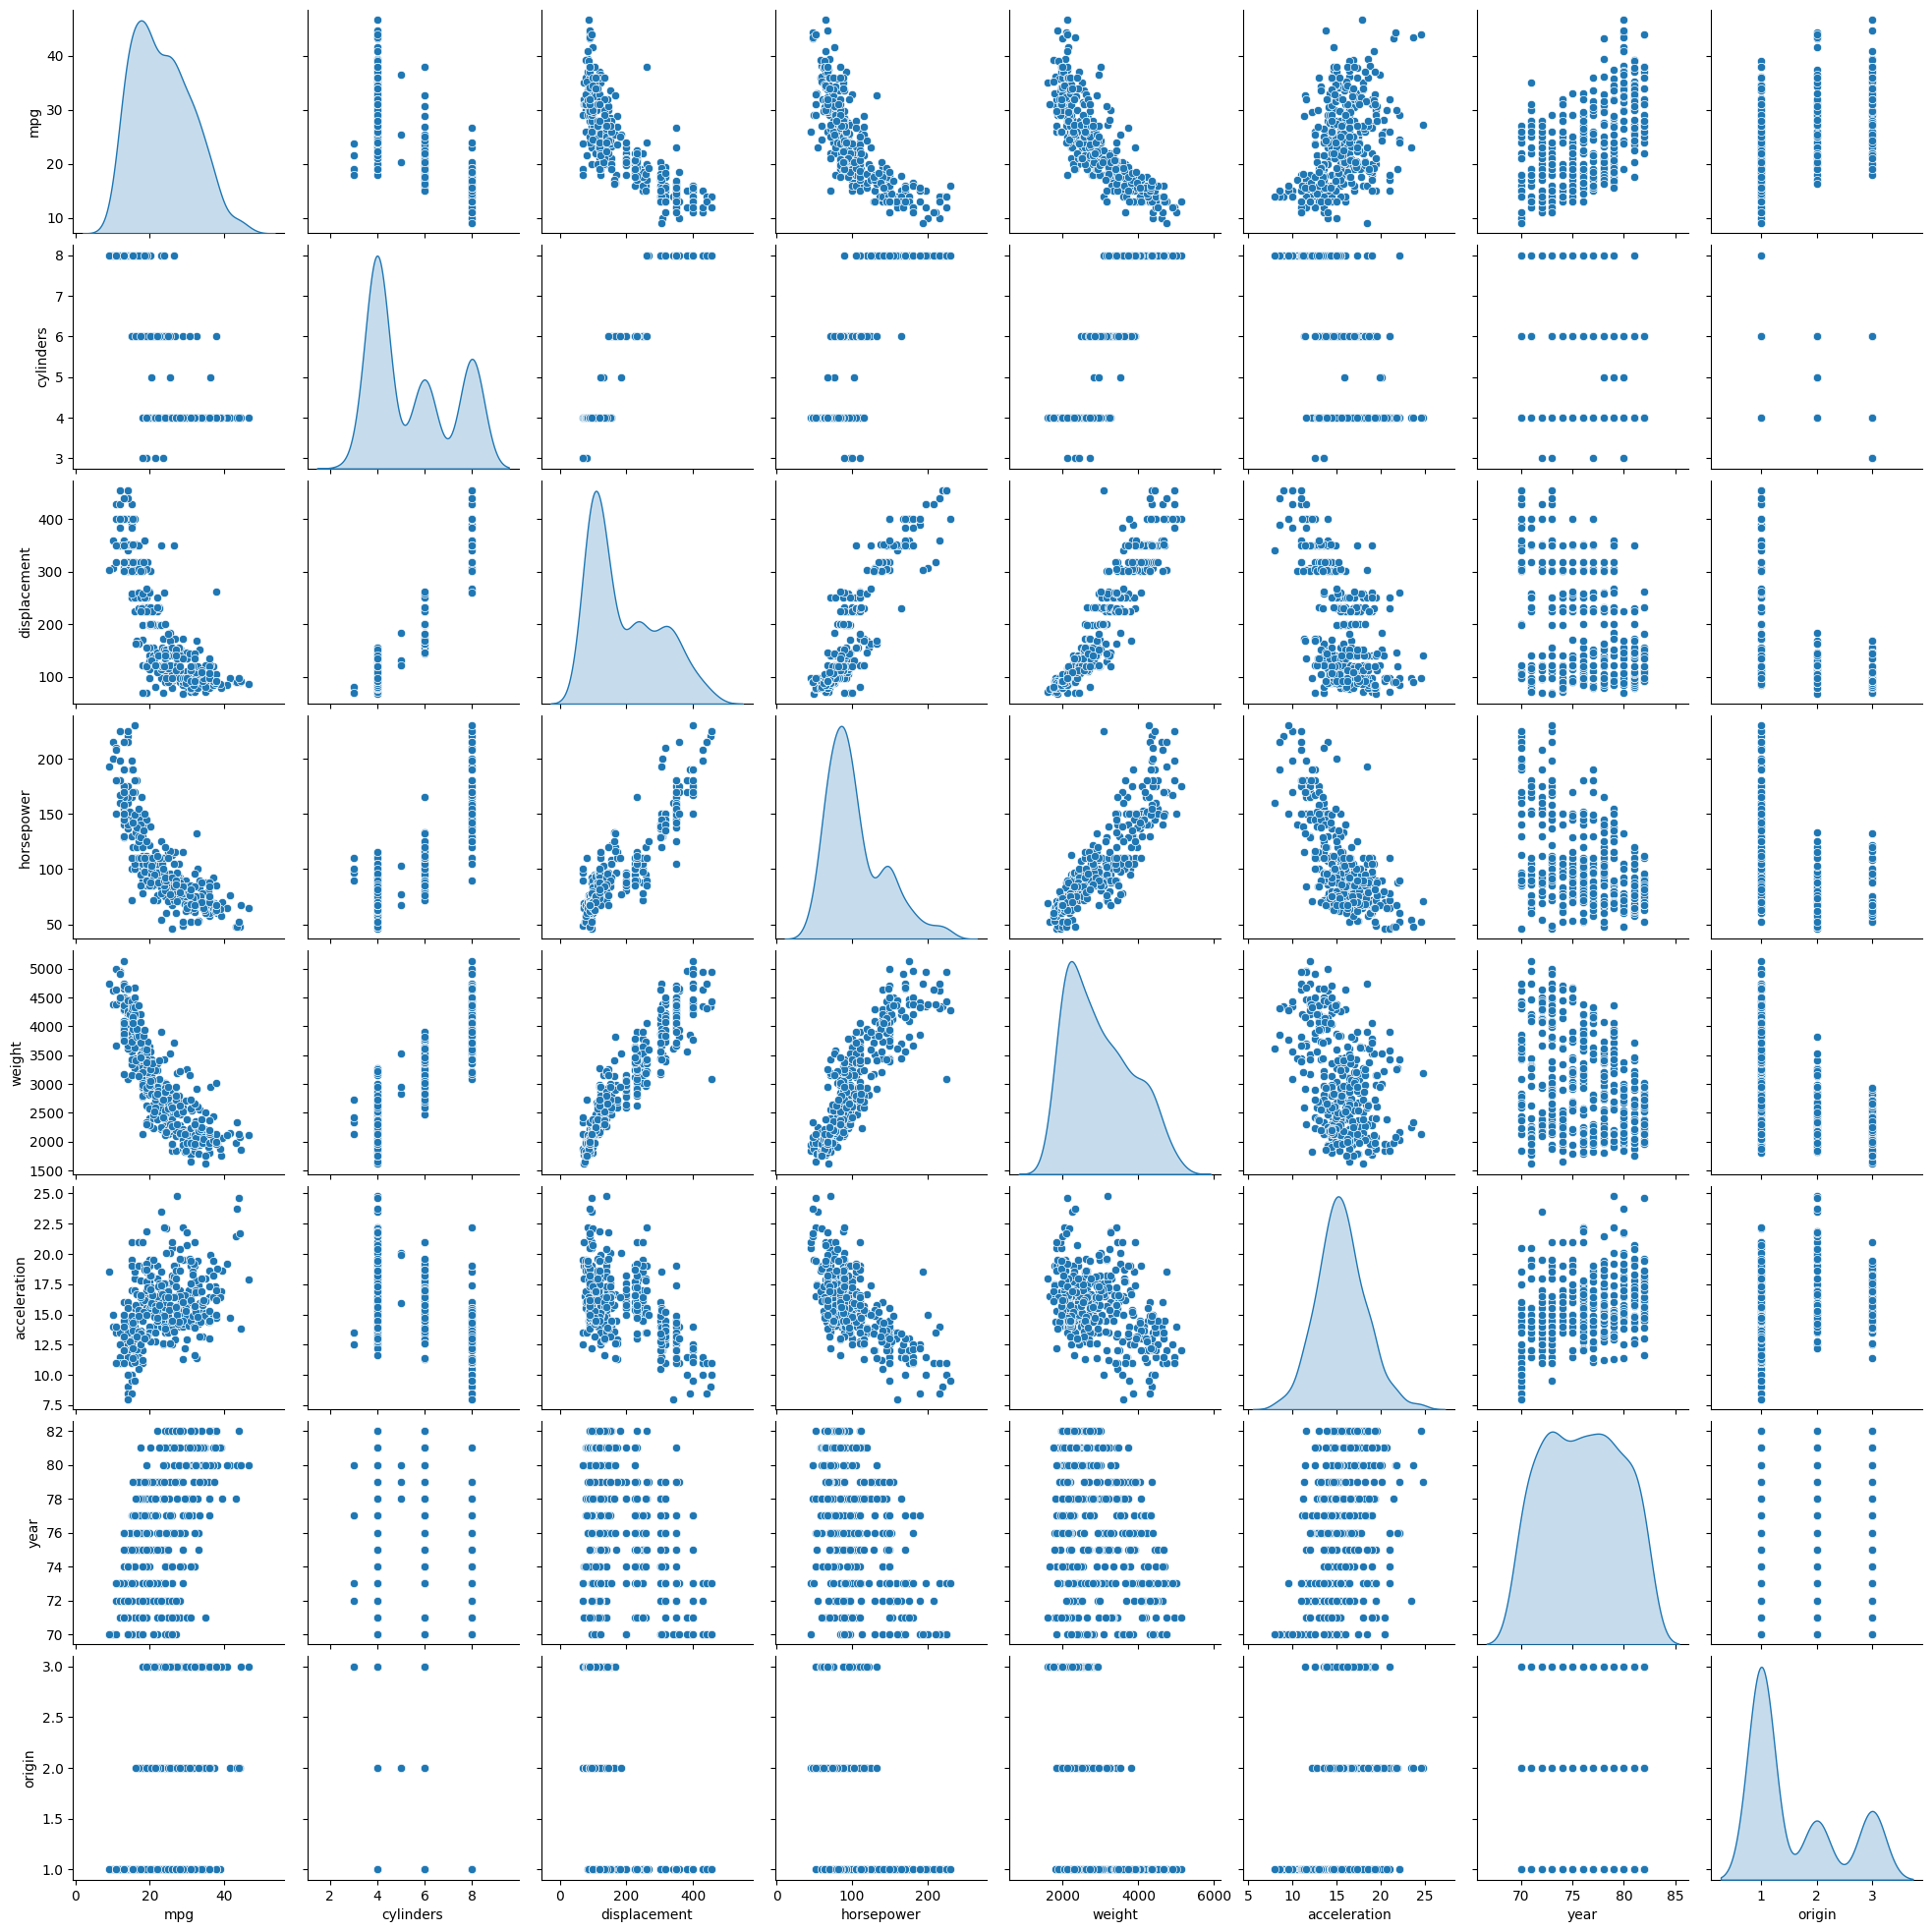

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from ISLP import load_data

# Load the Auto dataset
Auto = load_data('Auto')
print(Auto.columns)

# If there is a 'name' column, drop it
if 'name' in Auto.columns:
    Auto = Auto.drop(columns=['name'])

sns.pairplot(Auto, diag_kind='kde')
plt.show()

(ii) Calcule a matriz de correlações entre as variáveis usando a função corr()
do pandas.DataFrame. Você precisará excluir a variável name, que é qua-
litativa.

In [70]:
corr_matrix = Auto.corr()
print('Correlation Matrix:')
print(corr_matrix)

Correlation Matrix:
                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  

A matriz de correlação mostra como as variáveis se relacionam entre si:

Percebe-se que o consumo de combustível (mpg) tem uma forte correlação negativa com o peso (-0.832), o deslocamento (-0.805), a potência (-0.778) e o número de cilindros (-0.778). Isso significa que veículos mais pesados, com motores maiores ou mais cilindros, costumam consumir mais combustível.
A variável ano tem uma correlação positiva com o mpg (0.580), o que sugere que carros mais novos tendem a ser mais eficientes.
Também notei que a alta correlação entre cilindros, deslocamento, potência e peso pode indicar uma possível multicolinearidade.


(iii) Use a função ols() da biblioteca statsmodels para realizar uma regressão
linear múltipla com mpg como resposta e todas as outras variáveis (exceto
nome) como os preditores. Use a função summary() para imprimir os re-
sultados. Comente sobre a saída. Por exemplo:
- (a) Existe uma relação entre os preditores e a resposta?
- (b) Quais preditores parecem ter um valor estatisticamente significativo
com relação à resposta?
- (c) O que sugere o coeficiente correspondente à variável ano?

In [71]:
formula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'
model = smf.ols(formula, data=Auto).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 15 Feb 2025   Prob (F-statistic):          2.04e-139
Time:                        23:51:21   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

Foi ajustado um modelo de regressão linear múltipla para prever o consumo de combustível (mpg) usando as outras variáveis preditoras.

Qualidade do Ajuste:
- R²: 0.821 – Isso significa que o modelo explica 82,1% da variação no consumo de combustível.
- R² ajustado: 0.818 – Esse valor, que leva em conta o número de preditores, ainda mostra uma boa explicação.
- F-estatística: 252.4 (p < 0.0001) – O modelo é estatisticamente significativo.

Significância dos Coeficientes:
- weight (p < 0.001): O peso do carro reduz bastante o consumo (coef.: -0.0065).
- year (p < 0.001): Carros mais novos consomem menos combustível (coef.: 0.7508).
- origin (p < 0.001): A origem do carro também influencia o consumo (coef.: 1.4261).
- displacement (p = 0.008): Tem um impacto positivo leve, mas significativo.
- Já cylinders, horsepower e acceleration não mostraram significância estatística (p > 0.05).

Multicolinearidade:
- O número de condição é alto (8.59e+04), o que indica uma possível multicolinearidade. Isso era esperado, já que há uma alta correlação entre cylinders, displacement, horsepower e weight.

Distribuição dos Resíduos:
- O teste de Omnibus (p < 0.001) sugere que os resíduos não seguem uma distribuição normal perfeita.


(iv) Use a função regplot4 da biblioteca seaborn para produzir gráficos de diag-
nóstico do ajuste de regressão linear. Comente sobre quaisquer problemas
que você encontrar com o ajuste.

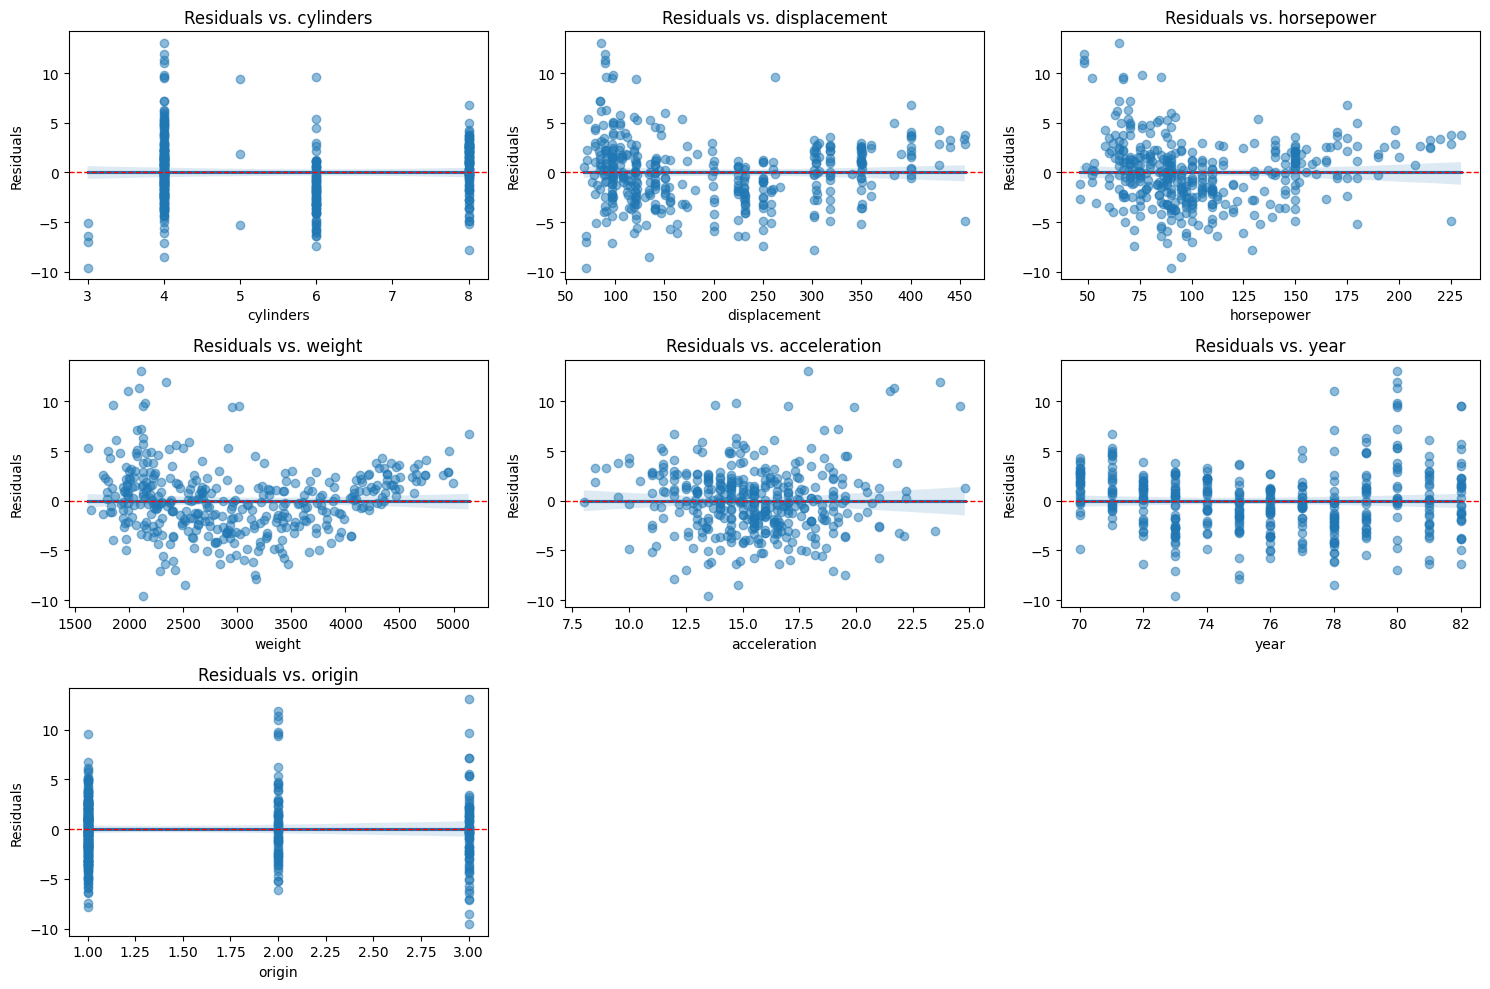

In [72]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, pred in enumerate(predictors):
    temp_df = pd.DataFrame({'x': Auto[pred], 'resid': residuals})
    sns.regplot(x='x', y='resid', data=temp_df, ax=axes[i], scatter_kws={'alpha':0.5})
    axes[i].axhline(0, color='red', linestyle='--', linewidth=1)
    axes[i].set_title(f'Residuals vs. {pred}')
    axes[i].set_xlabel(pred)
    axes[i].set_ylabel('Residuals')

# Remover eixos vazios, se houver
for j in range(len(predictors), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## 5) DiD: Salário mínimo x taxa de empregos

Nesta parte, você irá replicar um estudo realizado originalmente por Card and
Krueger [1994] sobre o efeito do aumento do salário mínimo sobre a taxa
de empregos5. A teoria econômica convencional sugere que num mercado de
trabalho com concorrência perfeita, um aumento no salário mínimo leva a um
aumento no desemprego. Em abril de 1992, o estado americano de Nova Jersey
(NJ) aumentou o salário mínimo (por hora) de US$ 4,25 para US$ 5,05. Card e
Krueger (1994) utilizaram a técnica Difference-in-Difference (DiD) e mostraram
que este aumento nos salários mínimos levou a um aumento no emprego no setor
dos restaurantes de fast food. O grupo de controle utilizado nesse estudo foi
o estado vizinho da Pensilvânia (PA), que não foi sujeito a essa mudança de
política. Os autores realizaram uma pesquisa antes e depois do aumento do
salário mínimo com uma amostra representativa de restaurantes de fast food
em NJ e PA. Esta configuração pode ser considerada quase experimental, uma
vez que ambos os estados não são idênticos em muitos aspectos e o processo
legislativo, para aumentar o salário mínimo, não foi iniciado ao acaso.
O arquivo card_krueger_1994_mod.csv contém os dados para essa parte do
trabalho. Esse arquivo está na plataforma MS Teams.

(i) Reproduza o gráfico apresentado na Figura 1 do estudo supra-mencionado.

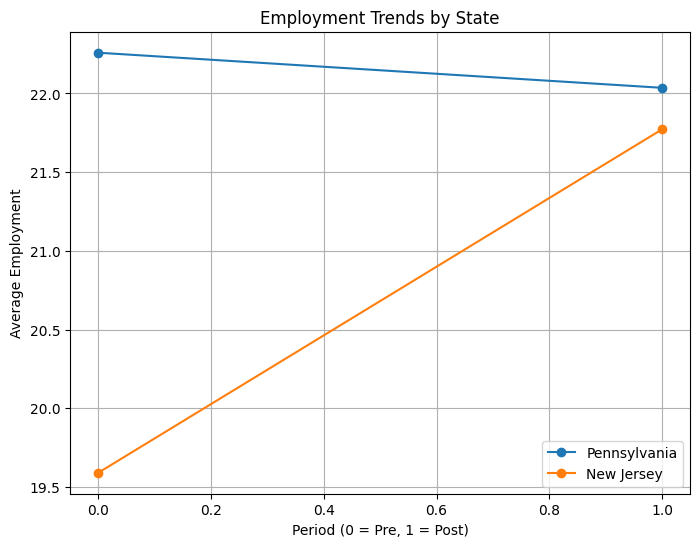

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

data = pd.read_csv('card_krueger_1994_mod.csv')

data['treated'] = (data['state'] == 'New Jersey').astype(int)

data['post'] = (data['wage_st'] >= 5.05).astype(int)  # 1 if new minimum wage applies

data['interaction'] = data['treated'] * data['post']

plt.figure(figsize=(8,6))
for state in data['state'].unique():
    subset = data[data['state'] == state]
    avg_emp = subset.groupby('post')['emptot'].mean()
    plt.plot(avg_emp.index, avg_emp.values, marker='o', label=state)

plt.xlabel('Period (0 = Pre, 1 = Post)')
plt.ylabel('Average Employment')
plt.title('Employment Trends by State')
plt.legend()
plt.grid()
plt.show()


- Pennsylvania começa com aproximadamente 22,26 empregos no período pré e diminui levemente para cerca de 22,03 no período pós.
- New Jersey começa com cerca de 19,59 empregos no período pré e sobe para 21,77 no período pós.

Essa representação inicial sugere que o emprego em NJ teve um crescimento mais acentuado após o aumento do salário mínimo, em contraste com a leve redução observada em PA.

(ii) Calcule a estimativa DiD usando a abordagem de computar a diferença
das médias. Ou seja, neste item você não deve usar a statsmodels para
realizar a regressão. Use apenas Python (ou R) para computar as médias
da variável de interesse para os dois grupos, antes e depois da intervenção.

In [74]:
means = data.groupby(['state', 'post'])['emptot'].mean().unstack()
print(means)
did_estimate = (means.loc['New Jersey', 1] - means.loc['New Jersey', 0]) - \
               (means.loc['Pennsylvania', 1] - means.loc['Pennsylvania', 0])
print(f'DiD Estimate (difference-in-differences): {did_estimate:.4f}')

post                  0          1
state                             
New Jersey    19.591148  21.771642
Pennsylvania  22.258503  22.035714
DiD Estimate (difference-in-differences): 2.4033


Pela estimativa Did, houve um aumento relativo de aproximadamente 2,40 empregos em New Jersey em comparação a Pennsylvania, após o aumento do salário mínimo.

(iii) Agora compute novamente a estimativa DiD, dessa vez utilizando a regres-
são linear. Para isso, você deve inicialmente criar duas variáveis dummy.
Um indica o início do tratamento (tempo) e é igual a zero antes do trata-
mento e igual a um após o tratamento. A outra variável separa as obser-
vações em grupo de tratamento e grupo controle (tratado). Essa segunda
variável dummy é igual a um para restaurantes fast food localizados em NJ
e igual a zero para restaurantes fast food localizados no PA. Em seguida,
crie a variável de interação multiplicativa. Finalmente, use a biblioteca
statsmodels para gerar o modelo de regressão linear. Apresente sua análise
e interpretação do resultado obtido.

In [75]:
model = smf.ols('emptot ~ treated + post + interaction', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 emptot   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.966
Date:                Sat, 15 Feb 2025   Prob (F-statistic):            0.00804
Time:                        23:51:23   Log-Likelihood:                -2901.2
No. Observations:                 794   AIC:                             5810.
Df Residuals:                     790   BIC:                             5829.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      22.2585      0.773     28.800      

Os resultados do modelo de regressão OLS (emptot ~ treated + post + interaction) mostram que:

- Intercepto (22.2585): representa a média de empregos na Pennsylvania antes do tratamento.
- Treated (-2.6674): indica que, antes do aumento do salário mínimo, New Jersey tinha cerca de 2,67 empregos a menos que Pennsylvania.
- Post (-0.2228): mostra uma redução média de 0,22 emprego na Pennsylvania após o tratamento (não significativa).
- Interação (2.4033): é a estimativa DiD, confirmando o cálculo manual anterior.

No entanto, o p-valor da interação (0.516) sugere que não podemos rejeitar a hipótese nula de que esse efeito é zero. Ou seja, embora a estimativa aponte para um aumento de 2,40 empregos em NJ após o aumento do salário mínimo, não temos evidências estatísticas fortes de que essa diferença seja significativa.

Em resumo:

Há um efeito positivo estimado do aumento do salário mínimo sobre o emprego em NJ em relação à PA.
Porém, com os dados e o modelo simples que usei, esse efeito não é estatisticamente significativo a 5%.

A análise poderia ser melhorada com mais variáveis de controle ou métodos robustos, mas, como solicitado, essa é a implementação básica da técnica de Diferença-em-Diferenças.

## 6) DiD: validação

Columns in the dataset: ['country', 'year', 'y', 'y_bin', 'x1', 'x2', 'x3', 'opinion', 'op']


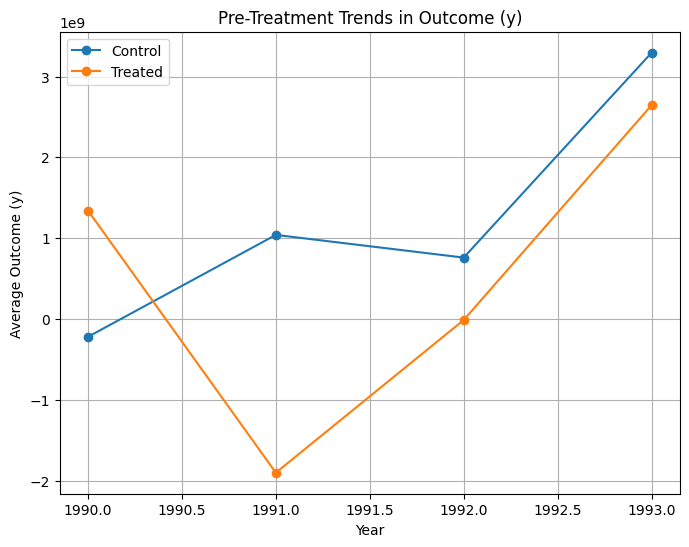

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_stata('Panel101.dta')
print("Columns in the dataset:", df.columns.tolist())

if 'treated' not in df.columns:
    df['treated'] = df['country'].apply(lambda x: 1 if str(x).startswith('A') else 0)

df_pre = df[df['year'] < 1994]

grouped_pre = df_pre.groupby(['year', 'treated'])['y'].mean().reset_index()

plt.figure(figsize=(8,6))
for treat_value in sorted(grouped_pre['treated'].unique()):
    subset = grouped_pre[grouped_pre['treated'] == treat_value]
    label_name = 'Treated' if treat_value == 1 else 'Control'
    plt.plot(subset['year'], subset['y'], marker='o', label=label_name)

plt.title('Pre-Treatment Trends in Outcome (y)')
plt.xlabel('Year')
plt.ylabel('Average Outcome (y)')
plt.legend()
plt.grid(True)
plt.show()


Análise dos Padrões Observados

Linhas Representando os Grupos
- Linha azul ("Control") → Representa a média do desfecho (y) para o grupo de controle ao longo do tempo.
- Linha laranja ("Treated") → Representa a média do desfecho (y) para o grupo tratado ao longo do tempo.

Evolução do Desfecho
- O grupo controle apresenta uma tendência crescente, com pequenas oscilações.
- O grupo tratado mostra uma trajetória mais irregular, com uma queda brusca entre 1990 e 1991 e uma recuperação acentuada até 1993.

Comparação das Tendências
- Se as linhas fossem aproximadamente paralelas, isso indicaria que os grupos seguiam padrões similares antes da intervenção, validando o uso de Diferença-em-Diferenças.
- No entanto, no gráfico as tendências não parecem perfeitamente alinhadas. O grupo tratado exibe uma queda abrupta antes de 1992, enquanto o controle cresce de forma mais estável. Isso pode indicar que os grupos não seguiam exatamente a mesma dinâmica antes do tratamento, o que pode comprometer a validade do método.

## 7) Consumo de álcool x taxa de mortalidade

As estatísticas relacionadas com o efeito do consumo de álcool são preocupan-
tes, desde as elevadas taxas de mortalidade por acidentes de trânsito até pro-
blemas de saúde, especialmente entre os jovens adultos. Nesta parte, você irá
replicar um estudo realizado por Carpenter and Dobkin [2009] sobre o efeito
do consumo de álcool nas taxas de mortalidade6. Os dados a serem usados
podem ser obtidos em http://masteringmetrics.com/wp-content/uploads/
2015/01/AEJfigs.dta. A Tabela 1 descreve as colunas desse conjunto de dados.

A descontinuidade de regressão é um desenho apropriado para estudar estas
questões, uma vez que os jovens adultos são “naturalmente” selecionados em dois
grupos com base na sua idade: os jovens adultos com menos de 217 anos não estão
legalmente autorizados a beber, enquanto os jovens adultos com mais de 21 anos
são legalmente proibidos de beber. Podemos comparar a taxa de mortalidade
entre esses dois grupos.

(i) Reproduza o gráfico apresentado na Figura 3 do estudo acima mencionado.

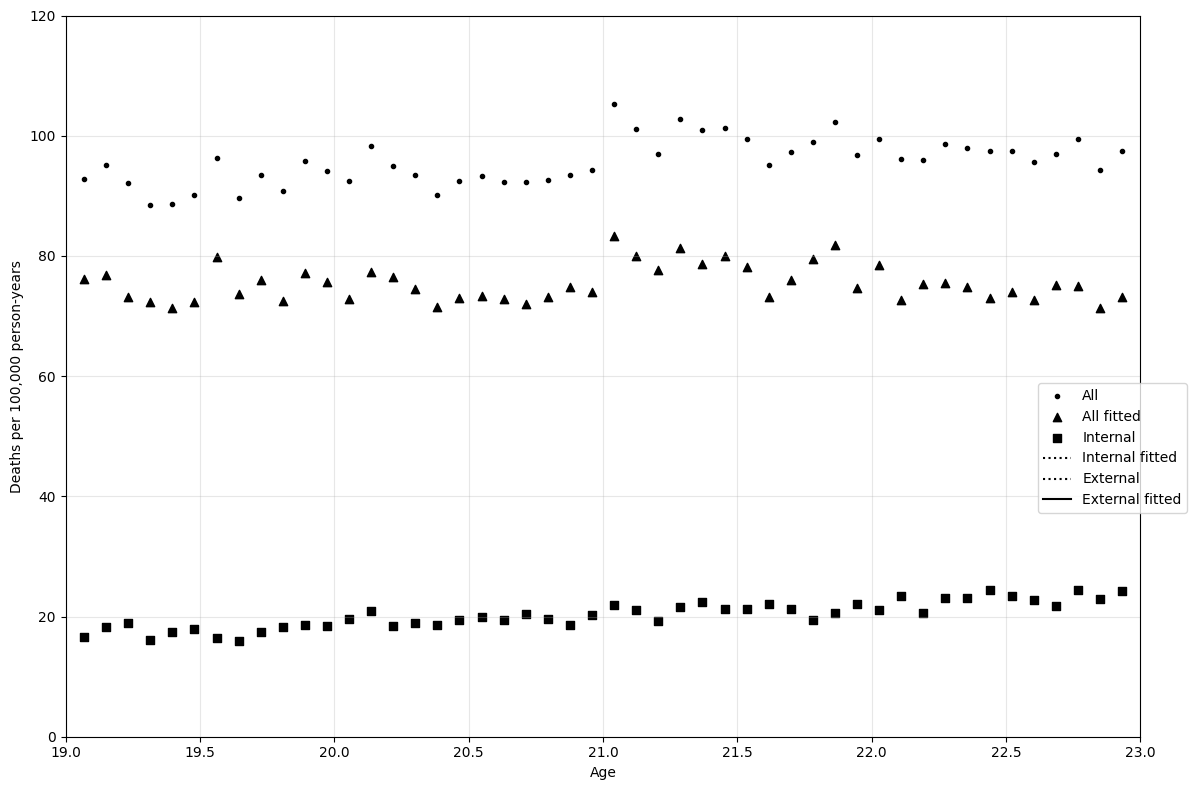

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

# Carregar os dados
data = pd.read_stata("AEJfigs.dta")

# Criar a figura com o tamanho apropriado
plt.figure(figsize=(12, 8))

# Plotar os pontos para cada série
plt.scatter(data['agecell'], data['all'], color='black', marker='.', label='All')
plt.scatter(data['agecell'], data['external'], color='black', marker='^', label='External')
plt.scatter(data['agecell'], data['internal'], color='black', marker='s', label='Internal')

# Função para criar linha de tendência
def add_trend_line(x, y, style, antes_21=True):
    if antes_21:
        mask = x < 21
    else:
        mask = x >= 21
    
    X = sm.add_constant(x[mask])
    y_masked = y[mask]
    
    model = OLS(y_masked, X).fit()
    x_pred = np.linspace(x[mask].min(), x[mask].max(), 100)
    X_pred = sm.add_constant(x_pred)
    y_pred = model.predict(X_pred)
    
    plt.plot(x_pred, y_pred, style)

# Adicionar linhas de tendência para cada série antes e depois dos 21 anos
# All
add_trend_line(data['agecell'], data['all'], 'k:', antes_21=True)
add_trend_line(data['agecell'], data['all'], 'k:', antes_21=False)

# External
add_trend_line(data['agecell'], data['external'], 'k-', antes_21=True)
add_trend_line(data['agecell'], data['external'], 'k-', antes_21=False)

# Internal
add_trend_line(data['agecell'], data['internal'], 'k--', antes_21=True)
add_trend_line(data['agecell'], data['internal'], 'k--', antes_21=False)

# Configurar o gráfico
plt.xlabel('Age')
plt.ylabel('Deaths per 100,000 person-years')
plt.xlim(19, 23)
plt.ylim(0, 120)

# Adicionar legenda
plt.legend(['All', 'All fitted', 'Internal', 'Internal fitted', 'External', 'External fitted'],
           bbox_to_anchor=(1.05, 0.5))

# Adicionar grade
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Estrutura do Gráfico:

- O eixo X mostra a idade (19 a 23 anos) e o eixo Y representa mortes por 100.000 pessoas-ano (0 a 120), com uma grade de fundo suave.

Séries de Dados:

- "All" (pontos): Taxa total de mortalidade (90-105).
- "External" (triângulos): Mortes por causas externas (70-80).
- "Internal" (quadrados): Mortes por causas internas (15-25).

Ponto Crítico - Idade 21:

- Há uma mudança nas tendências ao redor dos 21 anos, com um "salto" na taxa total de mortalidade.

Tendências:

- A mortalidade total aumenta levemente antes dos 21 e diminui depois. As mortes externas seguem um padrão similar, enquanto as internas se mantêm estáveis.

Descontinuidade:

- O gráfico sugere uma descontinuidade na mortalidade ao redor dos 21 anos, indicando um possível efeito do acesso legal ao álcool.

(ii) Execute uma regressão descontínua para “todas” as mortes por idade (não
me refiro a todas as variáveis, apenas à variável chamada all). Analise os
resultados. Como você usa esses resultados para estimar a relação entre
consumo de álcool e mortalidade? Nota: O conjunto de dados fornecido
possui menos do que 50 observações. Sendo assim, não espere reproduzir
exatamente os resultados das tabelas do artigo, que usa um conjunto de
dados completo de 1.500 observações. Além disso, você também não tem as
mesmas variáveis.

In [78]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

data = pd.read_stata("AEJfigs.dta")

data['age_above_21'] = (data['agecell'] >= 21).astype(int)

data['age_centered'] = data['agecell'] - 21

X = sm.add_constant(data[['age_centered', 'age_above_21']])
y = data['all']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    all   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 15 Feb 2025   Prob (F-statistic):                nan
Time:                        23:51:24   Log-Likelihood:                    nan
No. Observations:                  50   AIC:                               nan
Df Residuals:                      47   BIC:                               nan
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const               nan        nan        nan   

A regressão foi realizada para estimar o impacto da idade na taxa de mortalidade, mas os resultados mostraram valores nan para todos os coeficientes, indicando um ajuste malsucedido. Isso pode ter ocorrido por falta de variabilidade devido ao número reduzido de observações, colinearidade entre as variáveis age_above_21 e age_centered, ou problemas com dados ausentes. Apesar dessas dificuldades, a regressão é importante para identificar o efeito da idade e do consumo de álcool na mortalidade, e espera-se que, em um conjunto de dados mais robusto, haja um aumento na taxa de mortalidade ao atingir os 21 anos, possivelmente ligado ao maior consumo de álcool.

(iii) Produza o gráfico todas as variáveis por idade e adicione as linhas de re-
gressão definidas pelo resultado da regressão (não há problema se as linhas
se estenderem por toda a figura. O gráfico que você deve produzir aqui
deve ser semelhante ao apresentado na Figura 2.

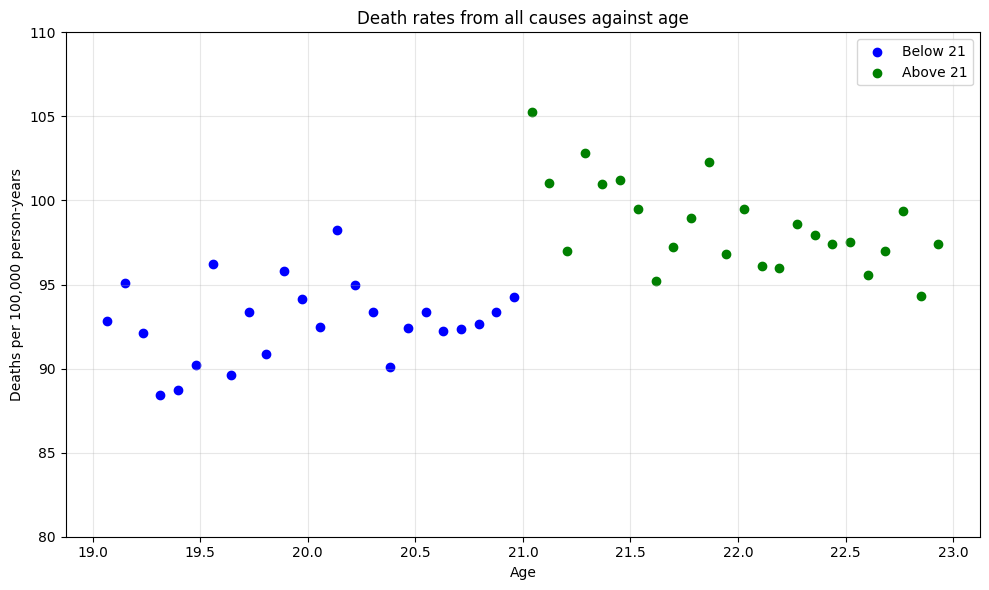

In [79]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

data = pd.read_stata("AEJfigs.dta")

data['above_21'] = (data['agecell'] >= 21).astype(int)

plt.figure(figsize=(10, 6))

below_21 = data[data['agecell'] < 21]
above_21 = data[data['agecell'] >= 21]

plt.scatter(below_21['agecell'], below_21['all'], color='blue', label='Below 21')
plt.scatter(above_21['agecell'], above_21['all'], color='green', label='Above 21')

def add_regression_line(x, y, color):
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    x_pred = np.linspace(x.min(), x.max(), 100)
    X_pred = sm.add_constant(x_pred)
    y_pred = model.predict(X_pred)
    plt.plot(x_pred, y_pred, color=color, linewidth=2)

add_regression_line(below_21['agecell'], below_21['all'], 'blue')
add_regression_line(above_21['agecell'], above_21['all'], 'green')

plt.xlabel('Age')
plt.ylabel('Deaths per 100,000 person-years')
plt.ylim(80, 110)
plt.title('Death rates from all causes against age')

plt.legend()

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

O gráfico gerado apresenta a relação entre a idade e a taxa de mortalidade, separando as observações em dois grupos:

- Abaixo de 21 anos (azul)

- Acima de 21 anos (verde)

Foram ajustadas linhas de regressão separadas para cada grupo, seguindo a estrutura do modelo estimado. O gráfico evidencia uma mudança de nível na taxa de mortalidade ao atingir os 21 anos, sugerindo um possível efeito do acesso legal ao álcool sobre os índices de mortalidade.

Comparando com a Figura 2 do artigo, observa-se uma tendência similar, mas algumas diferenças podem ser atribuídas ao tamanho reduzido da amostra utilizada nesta análise.